In [ ]:
# 315

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

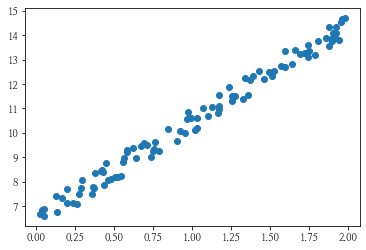

In [3]:
# y = 4x+6 을 근사 (w1=4, w0=6) 임의의 값은 노이즈를 위해 만듦
# 즉 w1:가중치, w0:바이어스값
X = 2*np.random.rand(100, 1)
y  = 6 + 4 * X + np.random.rand(100, 1)

# X, y 데이터 셋 산점도로 시각화
plt.scatter(X, y)

In [79]:
# 비용 함수
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.sqare(y - y_pred))/N
    return cost

In [80]:
# 가중치 업데이트
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산(행렬 간의 연산을 위해 앞뒤 행렬의 크기가 반대로되어야한다.)
    y_pred = np.dot(X, w1.T) + w0 # w0: b 바이어스값
    # 실제 값과 예측값의 차이 계산(비용함수)
    diff = y - y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    
    # w1, w0을 업데이트할 w1_update, w0_update 계산
    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [81]:
# 경사하강법
def gradient_descent_steps(X, y, iters=10000):
    # w0, w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters만큼 반복-
    # get_weight_updates 함수 호출해 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update # 경사하강법, +값이 나오면 빼주고, - 나오면 더해준다.
        w0 = w0 - w0_update
        
    return w1, w0

In [82]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print(w1, w0)

[[4.08737216]] [[6.41063932]]


In [83]:
# y = 4x + 6 과 비슷하다.

In [84]:
y_pred = w1[0,0]*X +w0

In [85]:
y[:2]

array([[ 8.55681196],
       [11.03259147]])

In [86]:
y_pred[:2]

array([[ 8.80291325],
       [11.04178136]])

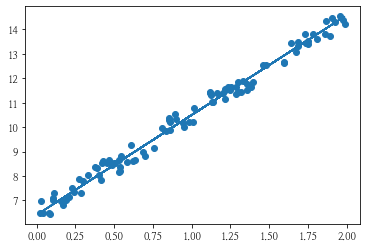

In [87]:
plt.scatter(X, y)
plt.plot(X, y_pred)